# Analysizing Returns from PPO model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the dataset

In [3]:
dataset_name =  'f_PPO_counting_1_deck_linear_lr_dataset.csv'
dataset = pd.read_csv('data/datasets/' + dataset_name,dtype=np.float32)
print(dataset.head())

   Ace  Two  Three  Four  Five  Six  Seven  Eight  Nine  Ten  Reward
0  1.0  2.0    1.0   2.0   2.0  1.0    1.0    3.0   1.0  6.0    -1.0
1  0.0  1.0    1.0   1.0   1.0  0.0    0.0    0.0   1.0  4.0     0.0
2  1.0  1.0    0.0   1.0   2.0  0.0    0.0    3.0   2.0  8.0    -1.0
3  2.0  2.0    1.0   3.0   0.0  1.0    1.0    3.0   3.0  7.0    -0.5
4  1.0  2.0    2.0   0.0   1.0  1.0    3.0    1.0   1.0  5.0    -0.5


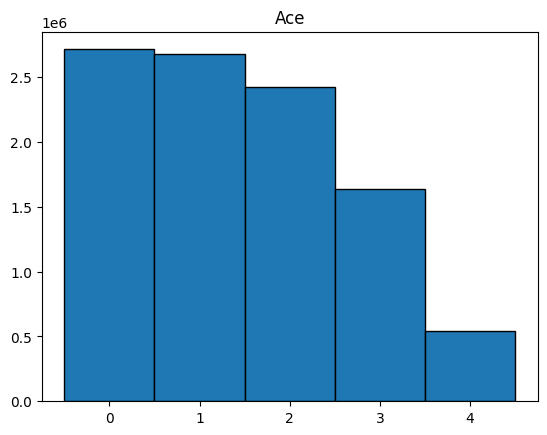

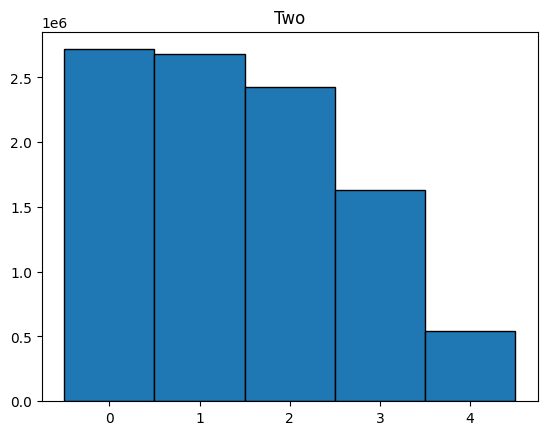

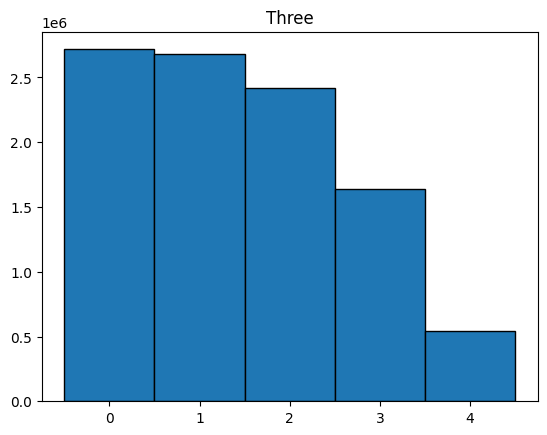

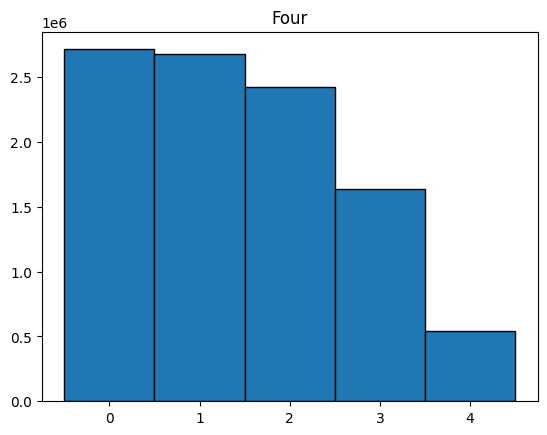

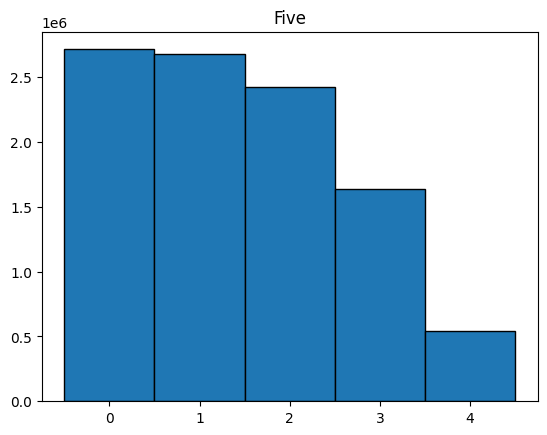

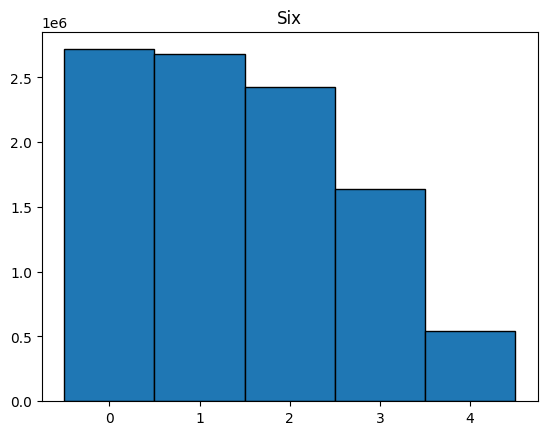

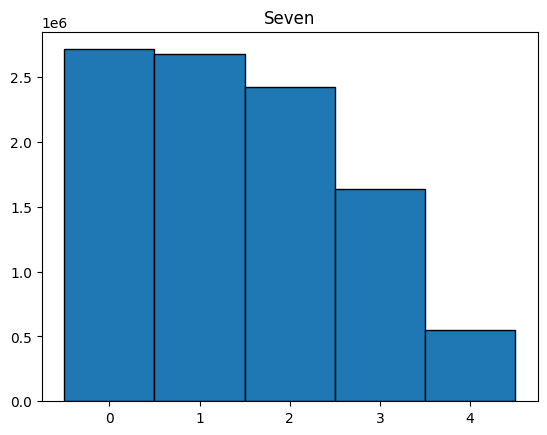

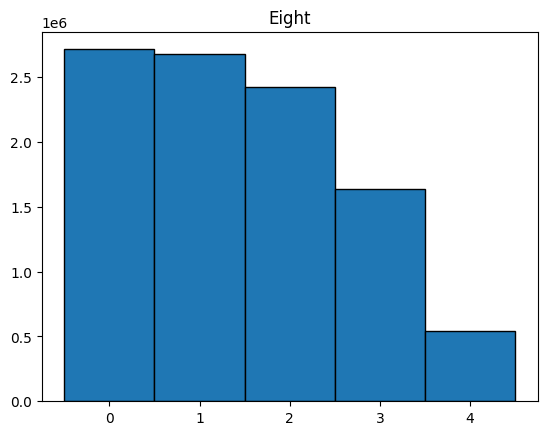

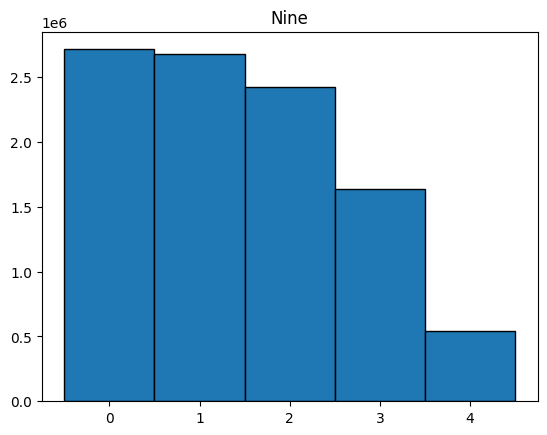

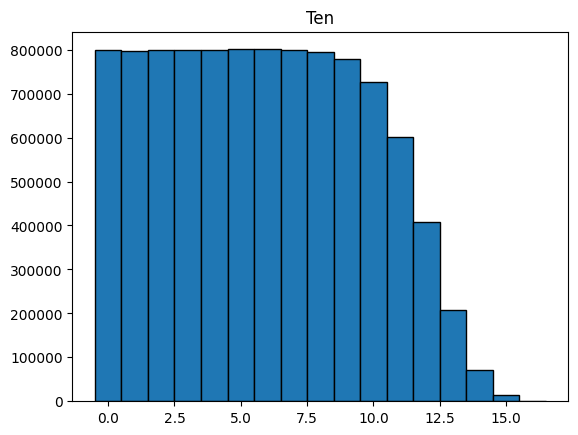

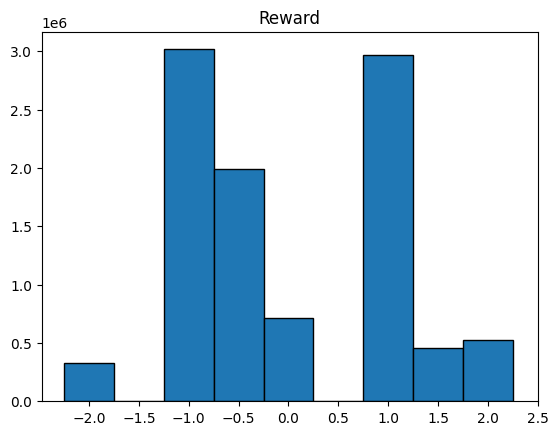

In [4]:
#print histogram of all columns

for i,column in enumerate(dataset.columns):
    plt.figure()
    plt.title(column)
    if i <=8 :
        #center the bins around the integers
        plt.hist(dataset[column], bins=np.arange(dataset[column].min(), dataset[column].max()+2)-0.5, edgecolor='black')
    elif i == 9:
        plt.hist(dataset[column], bins=np.arange(dataset[column].min(), dataset[column].max()+2)-0.5, edgecolor='black')
    else:
        #center around half integers -2.25 to -1.75, -1.75 to -1.25, -1.25 to -0.75, -0.75 to -0.25, -0.25 to 0.25, 0.25 to 0.75, 0.75 to 1.25, 1.25 to 1.75, 1.75 to 2.25
        plt.hist(dataset[column], bins=np.arange(dataset[column].min(), dataset[column].max()+1, 0.5)-0.25, edgecolor='black')
        plt.xticks(np.arange(-2,3,0.5))
    
        


([<matplotlib.axis.XTick at 0x1df5cf5dbd0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16')])

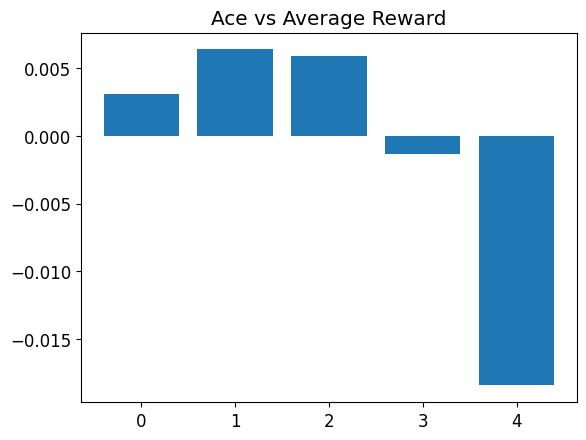

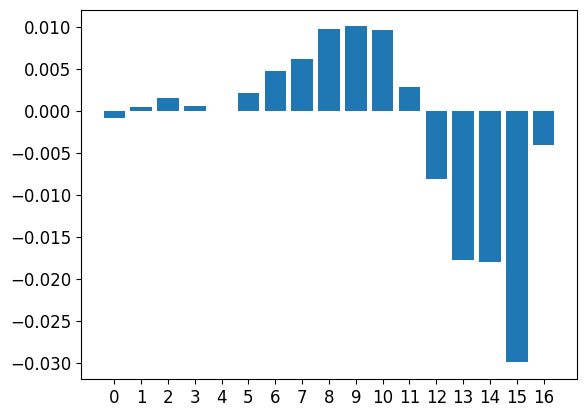

In [13]:
#plot aces against average reward
ace_avg_reward = dataset.groupby('Ace')['Reward'].mean()
tens_avg_reward = dataset.groupby('Ten')['Reward'].mean()

plt.figure()
plt.title('Ace vs Average Reward')
plt.bar(ace_avg_reward.index, ace_avg_reward.values)

plt.figure()
#font size
plt.rcParams.update({'font.size': 12})
#plt.title('Ten vs Average Reward')
plt.bar(tens_avg_reward.index, tens_avg_reward.values)
plt.xticks(np.arange(0,17,1))
plt.xlabel('# of 10,J,Q,K remaining')

[0.0245, 0.07500000000000001, 0.125, 0.175, 0.225, 0.275, 0.32499999999999996, 0.375, 0.42500000000000004, 0.475, 0.525, 0.575, 0.625, 0.675, 0.725, 0.775, 0.825, 0.875, 0.925, 0.975]


C:\Users\thgla\AppData\Local\Temp\ipykernel_68188\725810055.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tens_percentage_avg_reward = dataset.groupby(tens_percentage_binned)['Reward'].mean()


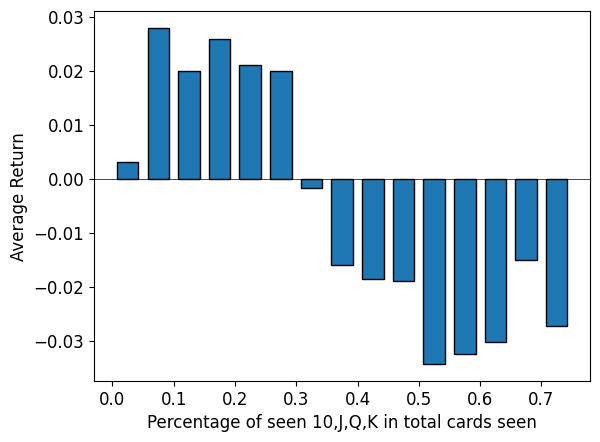

In [40]:
# count 10s remaining as a percentage of total cards remaining
total_cards = dataset['Ace'] + dataset['Two'] + dataset['Three'] + dataset['Four'] + dataset['Five'] + dataset['Six'] + dataset['Seven'] + dataset['Eight'] + dataset['Nine'] + dataset['Ten']

tens_percentage = dataset['Ten'] / total_cards

#bin the tens percentage into 10 bins
tens_percentage_binned = pd.cut(tens_percentage, 20)
tens_percentage_avg_reward = dataset.groupby(tens_percentage_binned)['Reward'].mean()

indexes = [tens_percentage_avg_reward.index[i].mid for i in range(len(tens_percentage_avg_reward.index))]
print(indexes)

plt.figure()
#plt.title('Percentage of seen 10,J,Q,K vs Average Return')
plt.bar(indexes[:15], tens_percentage_avg_reward.values[:15],edgecolor='black',width=0.035)
plt.xlabel('Percentage of seen 10,J,Q,K in total cards seen')
plt.ylabel('Average Return')
plt.xticks(np.arange(0,0.8,0.1))
#add x axis line
plt.axhline(0, color='black',linewidth=0.5)
